In [14]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [15]:
df_original = pd.read_csv('crimes.csv')
df_original

C:\Users\55279\AppData\Local\Temp\ipykernel_8532\1709524164.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('crimes.csv')


,crime,number,date,location,beat,neighborhood,npu,lat,long
0,LARCENY-NON VEHICLE,103040029,10/31/2010,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895
1,AUTO THEFT,103040061,10/31/2010,850 OAK ST SW,401,West End,T,33.74057,-84.41680
2,LARCENY-FROM VEHICLE,103040169,10/31/2010,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774
3,AUTO THEFT,103040174,10/31/2010,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674
4,LARCENY-NON VEHICLE,103040301,10/31/2010,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626
...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,09/01/2009,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741
270684,LARCENY-FROM VEHICLE,92442164,09/01/2009,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013
270685,LARCENY-NON VEHICLE,92448045,09/01/2009,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204
270686,LARCENY-NON VEHICLE,92440866,09/01/2009,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600


In [16]:
df_copia = df_original.copy(deep = True)

In [17]:
df_copia

,crime,number,date,location,beat,neighborhood,npu,lat,long
0,LARCENY-NON VEHICLE,103040029,10/31/2010,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895
1,AUTO THEFT,103040061,10/31/2010,850 OAK ST SW,401,West End,T,33.74057,-84.41680
2,LARCENY-FROM VEHICLE,103040169,10/31/2010,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774
3,AUTO THEFT,103040174,10/31/2010,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674
4,LARCENY-NON VEHICLE,103040301,10/31/2010,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626
...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,09/01/2009,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741
270684,LARCENY-FROM VEHICLE,92442164,09/01/2009,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013
270685,LARCENY-NON VEHICLE,92448045,09/01/2009,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204
270686,LARCENY-NON VEHICLE,92440866,09/01/2009,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600


# Crimes que o dataset possui

In [18]:
crime_unicos = df_copia["crime"].unique()

# Exibir as npu únicos
print(crime_unicos)

['LARCENY-NON VEHICLE' 'AUTO THEFT' 'LARCENY-FROM VEHICLE'
 'BURGLARY-RESIDENCE' 'ROBBERY-PEDESTRIAN' 'AGG ASSAULT' 'RAPE'
 'BURGLARY-NONRES' 'HOMICIDE' 'ROBBERY-RESIDENCE' 'ROBBERY-COMMERCIAL']


# NPUs (Municípios) que o dataset possui

In [19]:
npu_unicos = df_copia["npu"].unique()

# Exibir as crimes únicos
print(npu_unicos)

['M' 'T' 'X' 'Y' 'C' 'R' 'N' 'J' 'B' 'V' 'Z' 'W' 'O' 'F' 'E' 'H' 'I' 'P'
 'K' 'D' 'S' nan 'L' 'G' 'Q' 'A']


# Primeira pergunta: Quais crimes mais praticados por região (NPU) de Atlanta?

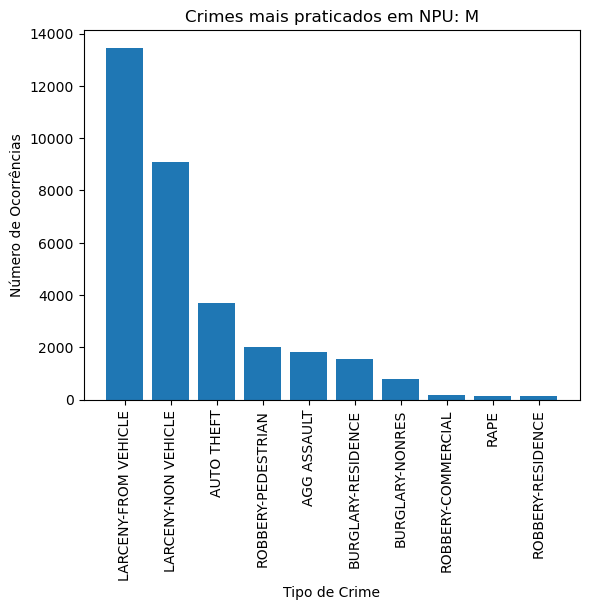

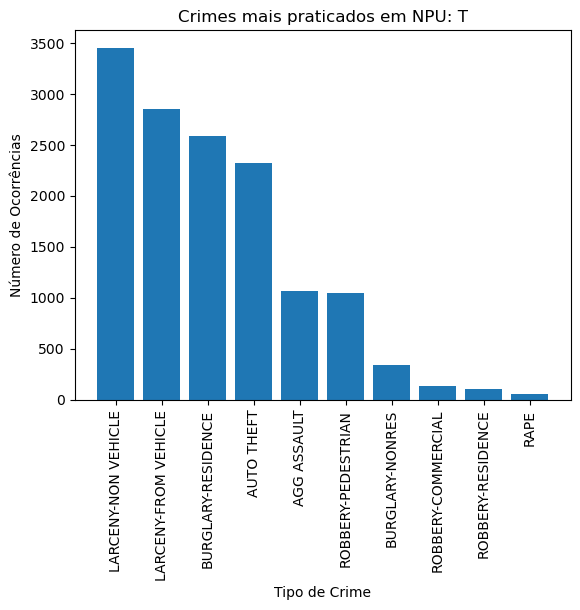

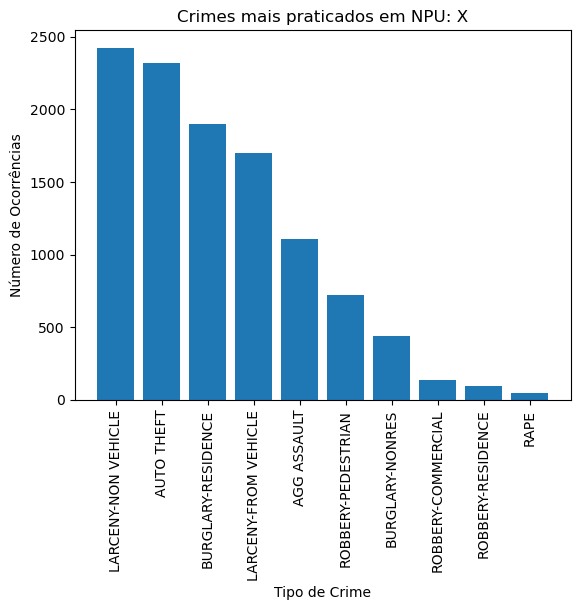

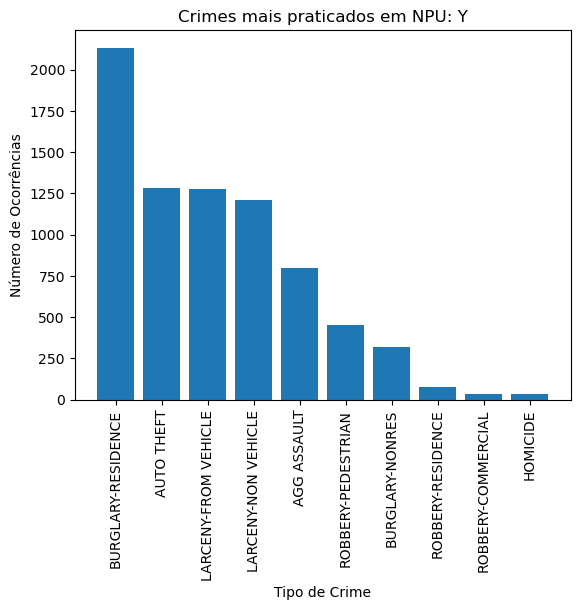

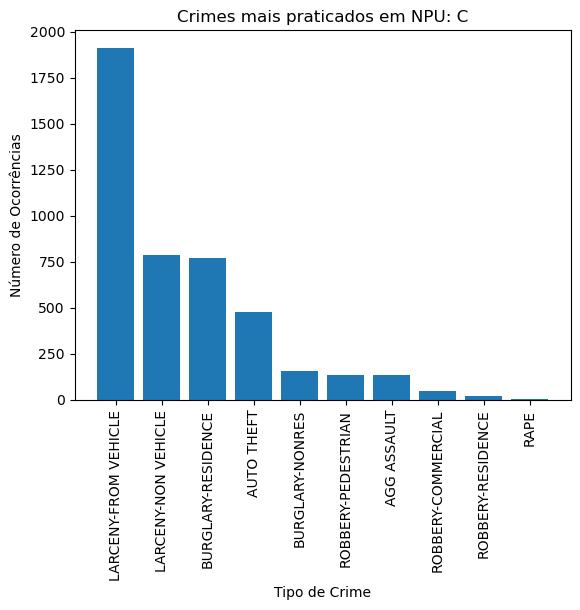

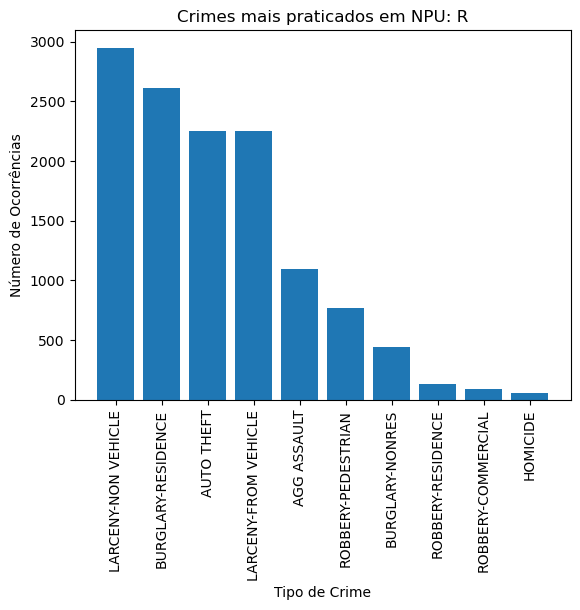

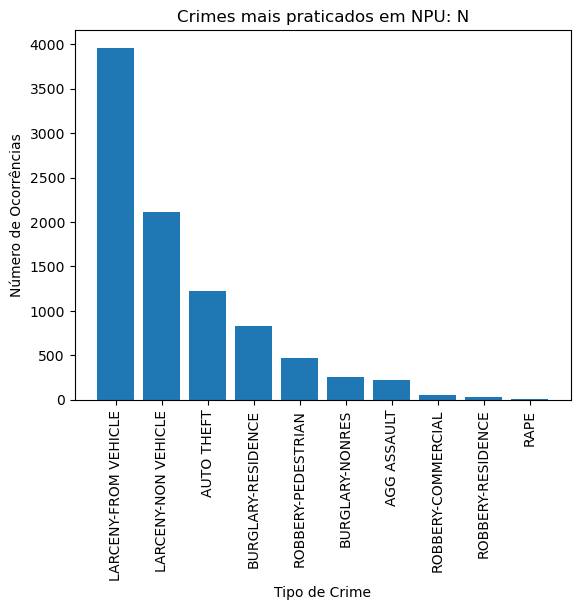

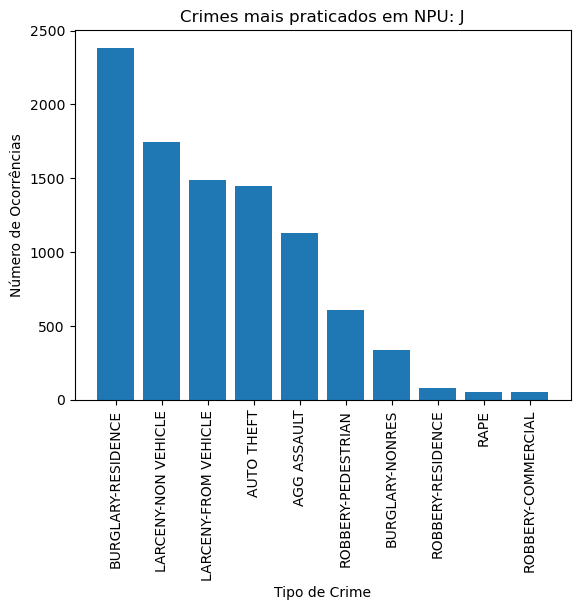

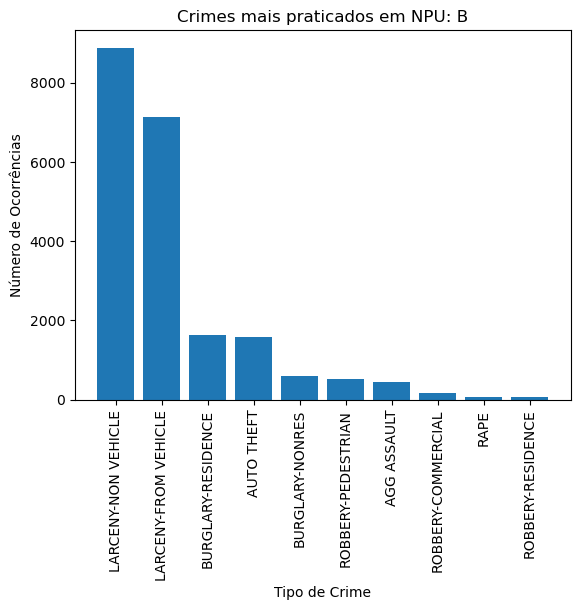

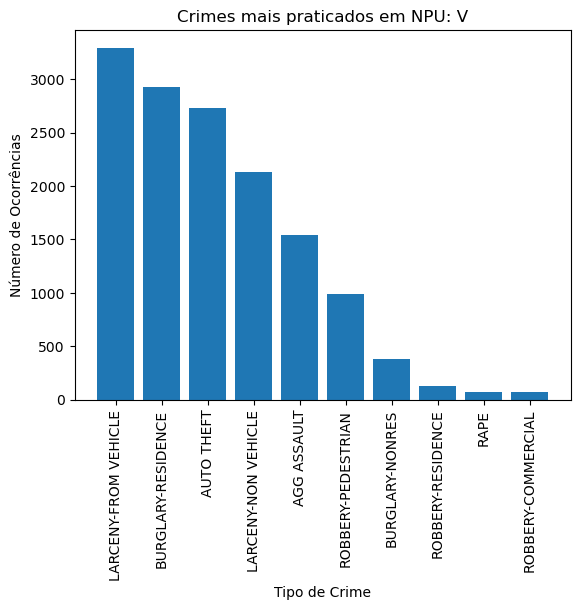

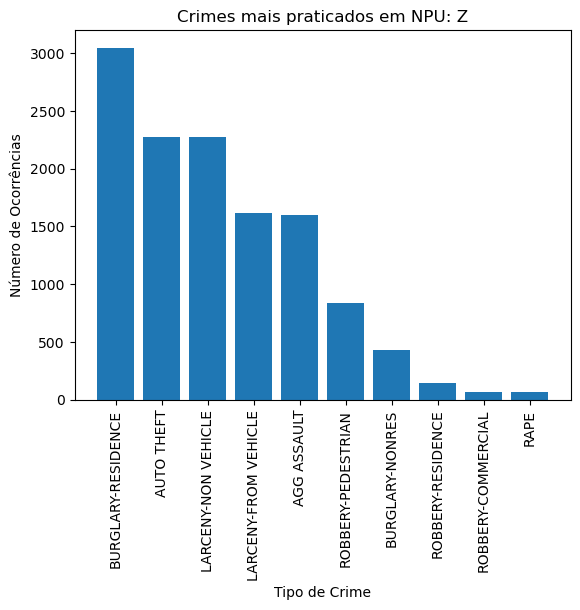

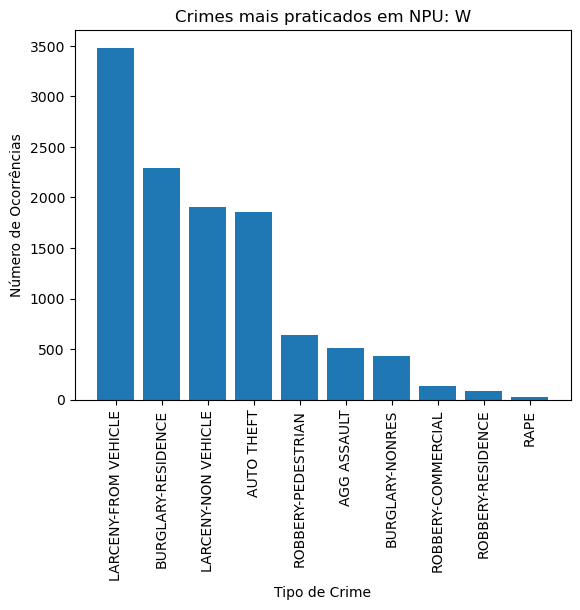

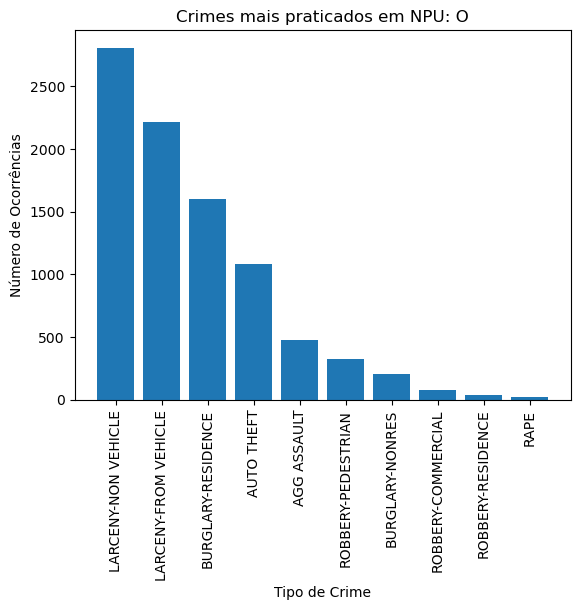

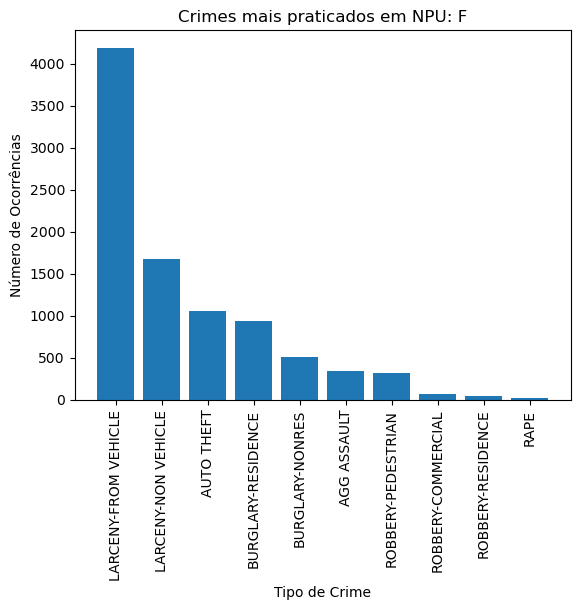

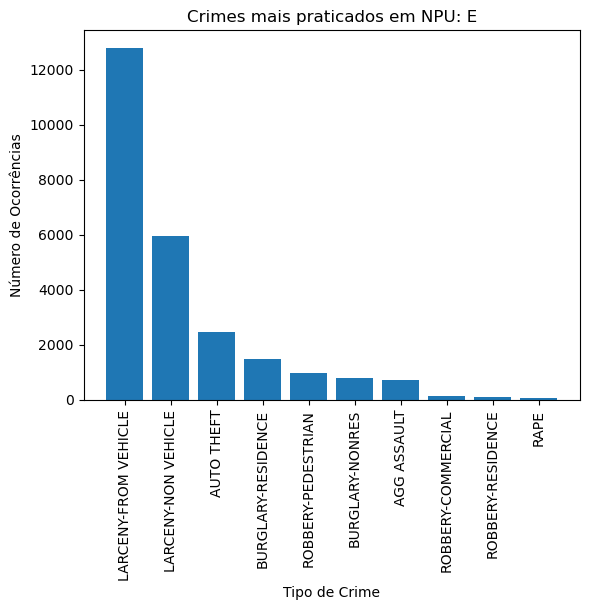

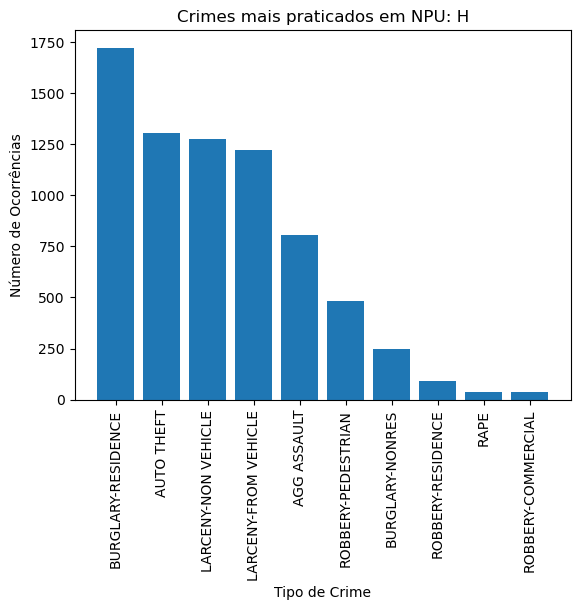

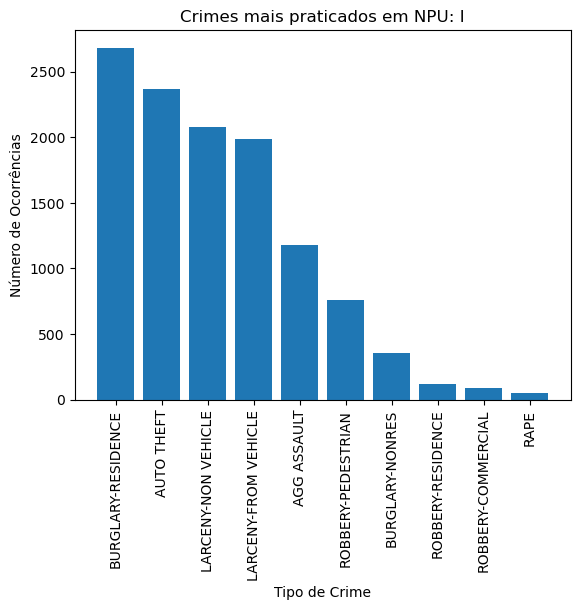

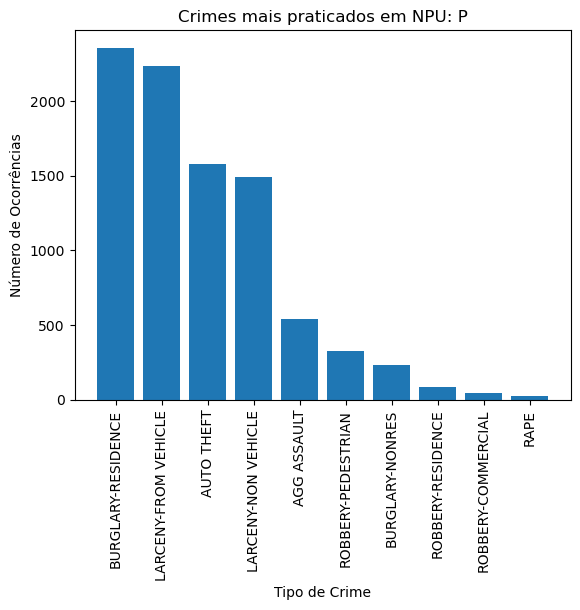

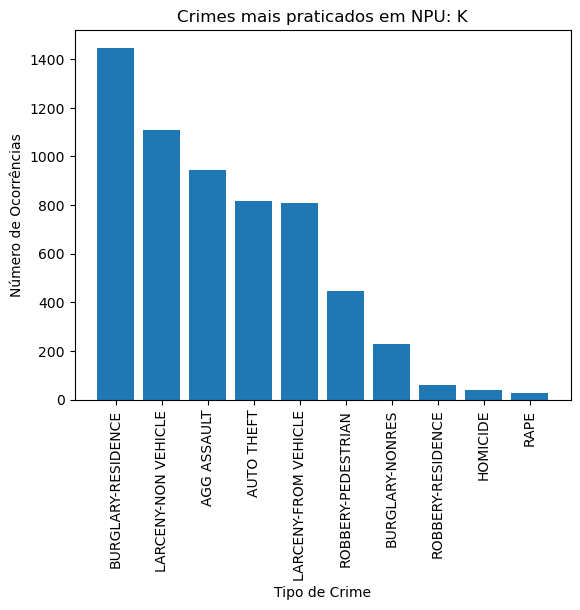

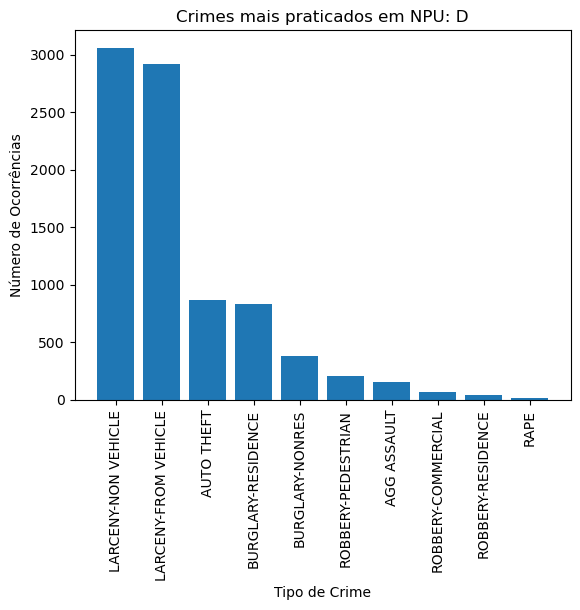

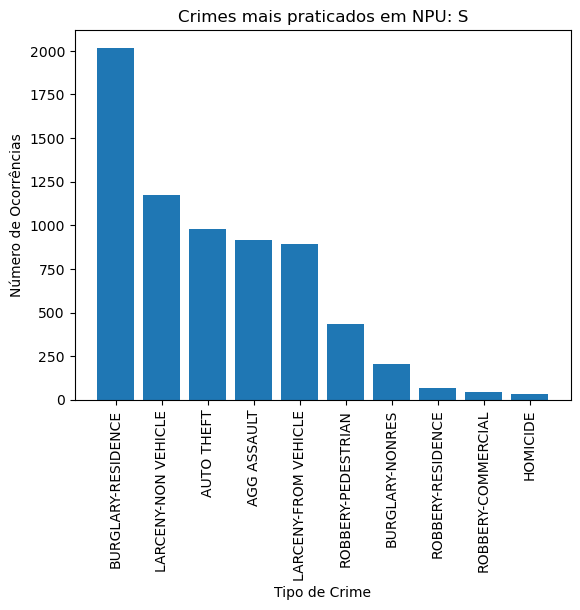

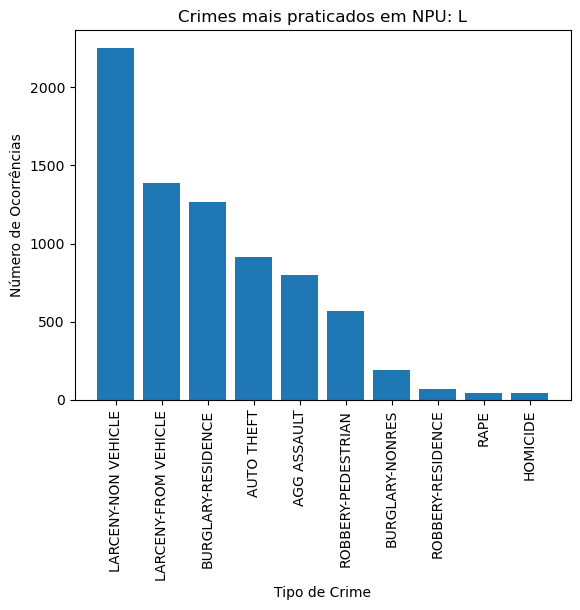

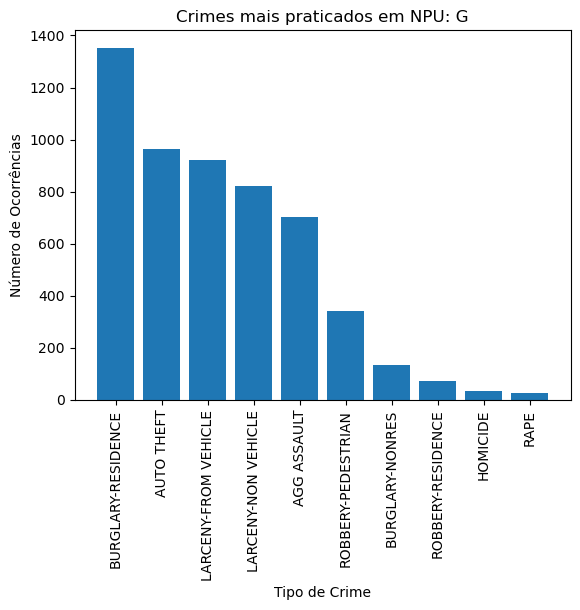

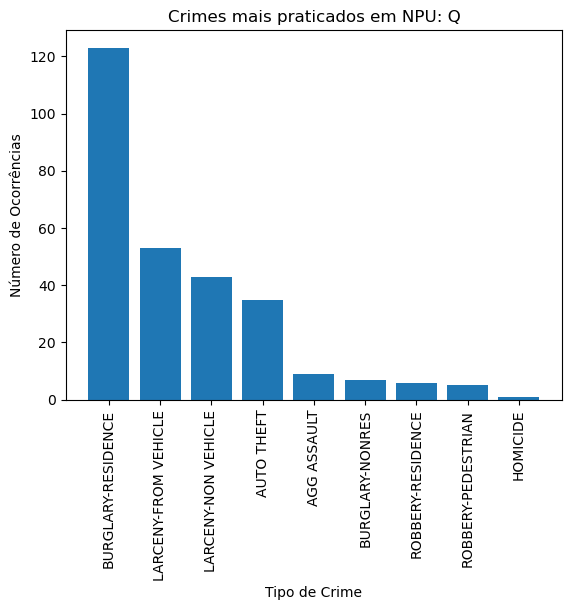

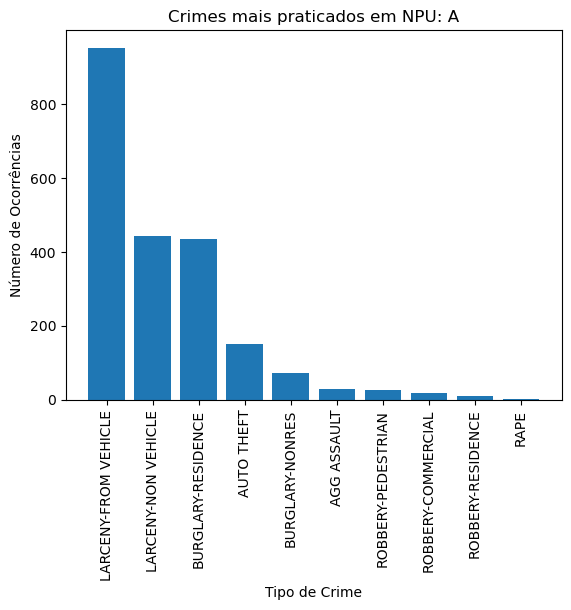

In [20]:
# Lista de NPUs desejadas
npus = ['M', 'T', 'X', 'Y', 'C', 'R', 'N', 'J', 'B', 'V', 'Z', 'W', 'O', 'F', 'E', 'H', 'I', 'P', 'K', 'D', 'S', 'L', 'G', 'Q', 'A']

# Agrupa os dados por NPU e crime e calcula a contagem
grouped = df_copia.groupby(['npu', 'crime']).size().reset_index(name='count')

# Filtra apenas as NPUs desejadas
grouped = grouped[grouped['npu'].isin(npus)]

# Ordena os dados pelo número de crimes em ordem decrescente
grouped = grouped.sort_values(by='count', ascending=False)

# Plota um gráfico de barras para cada NPU
for npu in npus:
    # Filtra os dados apenas para a NPU em questão
    df_npu = grouped[grouped['npu'] == npu].head(10)
    
    # Plota o gráfico de barras
    plt.figure()
    plt.bar(df_npu['crime'], df_npu['count'])
    plt.title('Crimes mais praticados em NPU: ' + npu)
    plt.xlabel('Tipo de Crime')
    plt.ylabel('Número de Ocorrências')
    plt.xticks(rotation=90)
    plt.show()

Ao observar os gráficos, o TOP 3 de crimes cometidos da da cidade de Atlanta é roubo com veículos motorizados, roubo com veículos não motorizados e arrombamento de residências. Em seguida roubo de carro. 

Os crimes que menos acontecem por região foi o Roubo/assalto a comerciante e estupro. 

Algumas das explicações para isso é a política de tolerância zero que existe em algumas cidades dos EUA desde 1990.

A expressão "TOLERÂNCIA ZERO" é sobretudo aplicada como um modelo de segurança pública em que a ação policial é especialmente intransigente com delitos menores, como não pagar o transporte público, a prostituição, os pequenos furtos etc. O sistema de tolerância zero tem como meta principal incutir o hábito do respeito à legalidade, o que produziria a médio prazo uma redução nos índices de microcriminalidade, bem como uma diminuição dos delitos de maior importância, como estupros e homicídios.

Embora a cidade de Atlanta não tenha implementado uma política de tolerância zero exatamente nos moldes da adotada em Nova York, a cidade tem tomado medidas para combater a criminalidade, incluindo a aplicação mais rigorosa das leis e a repressão imediata a pequenos delitos. Por exemplo, a polícia de Atlanta tem atuado com mais firmeza no combate a delitos menores, como vandalismo e furto de pequeno valor, com o objetivo de prevenir a ocorrência de crimes mais graves.

# Departamentos que possui a cidade de Atlanta

In [21]:
beat_unicos = df_copia["beat"].unique()

# Exibir as Departamentos únicos
print(beat_unicos)

['509' '401' '301' '307' '604' '205' '410' '201' '602' '109' '210' '211'
 '508' '303' '308' '605' '609' '212' '207' '114' '507' '505' '101' '305'
 '607' '603' '409' '411' '611' '404' '111' '412' '208' '104' '108' '601'
 '106' '612' '501' '511' '503' '213' '406' '110' '312' '204' '510' '402'
 '206' '302' '304' '50' '105' '102' '414' '103' '512' '112' '403' '502'
 '306' '310' '311' '408' '504' '203' '413' '707' '608' '606' '113' '506'
 '610' '313' '309' '407' '405' '209' '107' '202' '706' '705' '703' '704'
 '701' '709' '710' '702' '050' '    ' '708' '602 ' '404 ' '103 ' 403 404
 302 102 502 312 405 308 104 108 114 307 602 313 201 203 603 412 509 511
 109 612 113 608 208 301 604 212 306 112 413 204 304 605 512 110 408 210
 402 211 606 406 209 501 505 409 510 503 103 401 309 101 303 407 507 508
 410 411 207 205 609 414 305 213 611 111 206 310 506 106 504 610 107 105
 607 311 202 601 50 701 704 705 707 703 702 706 710 709 708 '309 ' '902']


# QUAL DEPARTAMENTO HOUVE MAIOR NÚMERO DE CHAMADOS POR ANO?


In [22]:
# Converter a coluna de data para o tipo datetime
df_copia["date"] = pd.to_datetime(df_copia["date"])

# Criar uma nova coluna para armazenar o ano de cada crime
df_copia["year"] = df_copia["date"].apply(lambda x: x.year)

# Agrupar os dados por ano e departamento, contando o número de ocorrências em cada grupo
grouped = df_copia.groupby(["year", "beat"]).size()

# Encontrar o índice (nome do departamento) que teve o maior número de ocorrências em cada ano
max_dept = grouped.groupby("year").idxmax()

# Imprimir o resultado
print(max_dept)

year
2009    (2009, 210)
2010    (2010, 210)
2011    (2011, 603)
2012    (2012, 210)
2013    (2013, 210)
2014    (2014, 501)
2015    (2015, 210)
2016    (2016, 501)
2017    (2017, 211)
dtype: object


# CRIMES POR DEPARTAMENTO DE ACORDO COM O ANO

In [23]:
# Converter a coluna de data para o tipo datetime
df_copia["date"] = pd.to_datetime(df_copia["date"])

# Agrupar os dados por NPU e ano, contando o número de crimes em cada grupo
crimes_por_beat_ano = df_copia.groupby(["beat", df_copia["date"].dt.year]).size()

# Exibir o resultado
print(crimes_por_beat_ano)

beat  date
50    2009     55
      2010     56
101   2009    115
      2010     63
      2011     97
             ... 
710   2013      4
      2014      2
      2016      1
      2017      1
902   2013      1
Length: 1445, dtype: int64


# QUANTIDADE DE CRIMES QUE OCORREU POR ANO EM CADA DEPARTAMENTO. 

## AQUI ESTAMOS PROVANDO QUE O DEPARTAMENTO 210, TEVE MAIS CHAMADOS NO ANO DE 2009

In [24]:
dados_2009 = df_copia[df_copia["date"].dt.year == 2009]

# Agrupar os dados filtrados por Beat e contar o número de ocorrências em cada grupo
contagem_crimes = dados_2009.groupby("beat").count()["crime"]

# Ordenar a contagem de crimes em ordem decrescente
contagem_crimes = contagem_crimes.sort_values(ascending=False)

# Exibir a contagem de crimes por departamento
print("Quantidade de crimes por departamento em 2009:")
print(contagem_crimes)

Quantidade de crimes por departamento em 2009:
beat
210    800
505    584
603    574
501    542
602    539
      ... 
50      55
413     47
701      5
701      1
702      1
Name: crime, Length: 161, dtype: int64


# QUANTIDADE DE CRIMES QUE OCORREU POR ANO EM CADA DEPARTAMENTO. 

## AQUI ESTAMOS PROVANDO QUE O DEPARTAMENTO 210, TEVE MAIS CHAMADOS NO ANO DE 2010

In [25]:
dados_2010 = df_copia[df_copia["date"].dt.year == 2010]

# Agrupar os dados filtrados por Beat e contar o número de ocorrências em cada grupo
contagem_crimes = dados_2010.groupby("beat").count()["crime"]

# Ordenar a contagem de crimes em ordem decrescente
contagem_crimes = contagem_crimes.sort_values(ascending=False)

# Exibir a contagem de crimes por Departamento
print("Quantidade de crimes por Departamento em 2010:")
print(contagem_crimes)


Quantidade de crimes por Departamento em 2010:
beat
210     707
501     547
211     516
204     512
603     509
       ... 
701       3
          2
701       2
309       1
705       1
Name: crime, Length: 165, dtype: int64


# QUANTIDADE DE CRIMES QUE OCORREU POR ANO EM CADA DEPARTAMENTO. 

## AQUI ESTAMOS PROVANDO QUE O DEPARTAMENTO 603, TEVE MAIS CHAMADOS NO ANO DE 2011

In [26]:
dados_2011 = df_copia[df_copia["date"].dt.year == 2011]

# Agrupar os dados filtrados por Beat e contar o número de ocorrências em cada grupo
contagem_crimes = dados_2011.groupby("beat").count()["crime"]

# Ordenar a contagem de crimes em ordem decrescente
contagem_crimes = contagem_crimes.sort_values(ascending=False)

# Exibir a contagem de crimes por Departamento
print("Quantidade de crimes por Departamento em 2011:")
print(contagem_crimes)


Quantidade de crimes por Departamento em 2011:
beat
603    628
210    588
604    553
304    501
508    475
      ... 
707      6
701      4
702      3
706      2
702      2
Name: crime, Length: 170, dtype: int64


# QUANTIDADE DE CRIMES QUE OCORREU POR ANO EM CADA DEPARTAMENTO. 

## AQUI ESTAMOS PROVANDO QUE O DEPARTAMENTO 211, TEVE MAIS CHAMADOS NO ANO DE 2017

In [27]:
dados_2017 = df_copia[df_copia["date"].dt.year == 2017]

# Agrupar os dados filtrados por Beat e contar o número de ocorrências em cada grupo
contagem_crimes = dados_2017.groupby("beat").count()["crime"]

# Ordenar a contagem de crimes em ordem decrescente
contagem_crimes = contagem_crimes.sort_values(ascending=False)

# Exibir a contagem de crimes por Departamento
print("Quantidade de crimes por Departamento em 2017:")
print(contagem_crimes)


Quantidade de crimes por Departamento em 2017:
beat
211    117
501     97
602     95
210     93
208     92
      ... 
703     13
706     11
705     10
704      7
710      1
Name: crime, Length: 83, dtype: int64


# Ano que teve mais crime?

In [28]:
contagem_crimes_por_ano = df_copia["date"].dt.year.value_counts()

# Obter o índice (ou seja, o ano) do maior valor na série de contagem
ano_mais_crimes = contagem_crimes_por_ano.idxmax()

# Exibir o ano com maior quantidade de crimes
print(f"O ano com maior quantidade de crimes foi {ano_mais_crimes}.")

O ano com maior quantidade de crimes foi 2009.


In [29]:
# Contar a quantidade de ocorrências por ano na coluna "date"
contagem_crimes_por_ano = df_copia["date"].dt.year.value_counts()

# Ordenar a série de contagem pelos anos em ordem crescente
contagem_crimes_por_ano = contagem_crimes_por_ano.sort_index()

# Exibir a contagem de crimes por ano em ordem crescente
print("Quantidade de crimes por ano em ordem crescente:")
print(contagem_crimes_por_ano)

Quantidade de crimes por ano em ordem crescente:
2009    39626
2010    35770
2011    35174
2012    33394
2013    32303
2014    31166
2015    30117
2016    29131
2017     4007
Name: date, dtype: int64


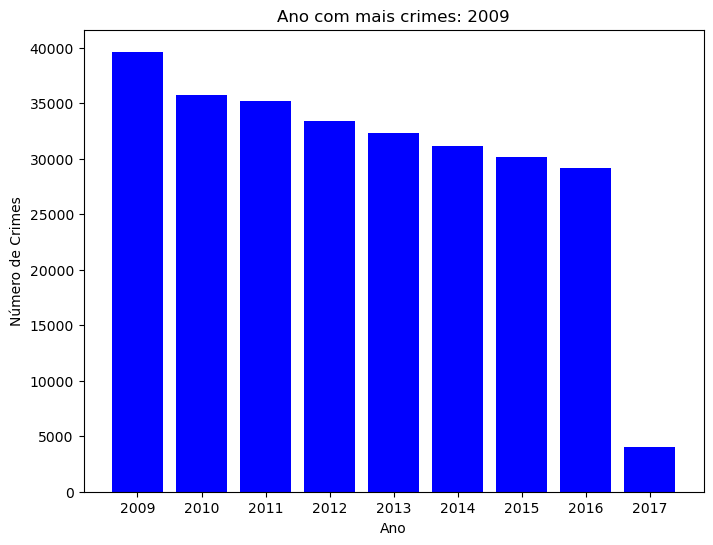

In [30]:
# Extrair o ano da coluna "date"
df_copia["Ano"] = pd.to_datetime(df_copia["date"]).dt.year

# Contar o número de crimes por ano
contagem_crimes_por_ano = df_copia.groupby("Ano").size()

# Encontrar o ano com mais crimes
ano_mais_crimes = contagem_crimes_por_ano.idxmax()

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8,6))

# Plotar a contagem por ano
ax.bar(contagem_crimes_por_ano.index, contagem_crimes_por_ano, color="blue")

# Configurar o eixo x
ax.set_xticks(contagem_crimes_por_ano.index)
ax.set_xlabel("Ano")

# Configurar o eixo y
ax.set_ylabel("Número de Crimes")

# Definir o título do gráfico
ax.set_title(f"Ano com mais crimes: {ano_mais_crimes}")

# Exibir o gráfico
plt.show()


Notasse que a quantidade de crimes vem diminuindo de acordo com os anos. Conforme citado antes a polícia de Atlanta tem atuado com mais firmeza no combate a delitos. O que por consequência, ter uma polícia mais ostenciva e com mais firmeza temos casos como esse das matérias a seguir:

https://g1.globo.com/mundo/noticia/2020/06/14/atlanta-identifica-dois-suspeitos-de-matar-homem-negro-em-abordagem-policial.ghtml
https://noticias.uol.com.br/internacional/ultimas-noticias/2020/06/14/manifestantes-incendeiam-restaurante-apos-policia-matar-homem-negro-nos-eua.htm


Não devemos considerar o dado de 2017, pois ele não está completo. Ele possui dados até Fevereiro. 

# Quais crimes mais praticados na cidade por ano?

In [31]:
# Agrupar os dados por ano e por tipo de crime e contar as ocorrências
contagem_crimes_por_ano_e_tipo = df_copia.groupby([df_copia["date"].dt.year, "crime"]).size()

# Ordenar as contagens em ordem decrescente
contagem_crimes_por_ano_e_tipo = contagem_crimes_por_ano_e_tipo.sort_values(ascending=False)

# Exibir as contagens de crimes por ano e por tipo em ordem decrescente
print("Crimes mais praticados na cidade por ano:")
print(contagem_crimes_por_ano_e_tipo)

Crimes mais praticados na cidade por ano:
date  crime               
2009  LARCENY-FROM VEHICLE    11046
2016  LARCENY-FROM VEHICLE     9980
2015  LARCENY-FROM VEHICLE     9539
2014  LARCENY-FROM VEHICLE     9432
2013  LARCENY-FROM VEHICLE     9286
                              ...  
2009  HOMICIDE                   80
2017  RAPE                       33
      ROBBERY-COMMERCIAL         31
      ROBBERY-RESIDENCE          22
      HOMICIDE                   15
Length: 99, dtype: int64


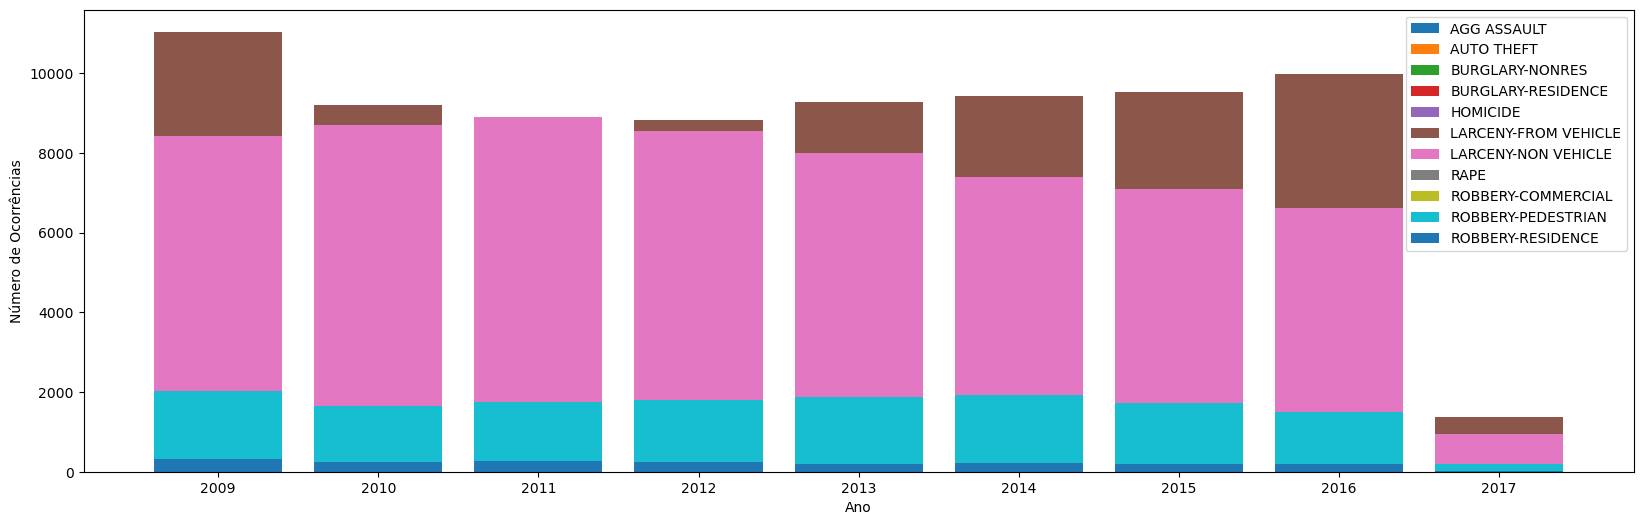

In [32]:
# Agrupar os dados por ano e por tipo de crime e contar as ocorrências
contagem_crimes_por_ano_e_tipo = df_copia.groupby([df_copia["date"].dt.year, "crime"]).size()

# Resetar o índice e renomear as colunas
contagem_crimes_por_ano_e_tipo = contagem_crimes_por_ano_e_tipo.reset_index()
contagem_crimes_por_ano_e_tipo.columns = ["Ano", "Tipo de Crime", "Contagem"]

# Criar um DataFrame separado para cada tipo de crime
df_tipos_crime = {}
for tipo in contagem_crimes_por_ano_e_tipo["Tipo de Crime"].unique():
    df_tipos_crime[tipo] = contagem_crimes_por_ano_e_tipo[contagem_crimes_por_ano_e_tipo["Tipo de Crime"] == tipo]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(20,6))

# Para cada tipo de crime, criar uma barra separada com a contagem por ano
for i, tipo in enumerate(df_tipos_crime.keys()):
    ax.bar(df_tipos_crime[tipo]["Ano"], df_tipos_crime[tipo]["Contagem"], color=f"C{i}", label=tipo)

# Configurar o eixo x
ax.set_xticks(df_copia["date"].dt.year.unique())
ax.set_xlabel("Ano")

# Configurar o eixo y
ax.set_ylabel("Número de Ocorrências")

# Adicionar uma legenda
ax.legend()

# Exibir o gráfico
plt.show()

# Este Gráfico tem o objetivo de mostrar quais crimes são mais práticados por ano na cidade de Atlanta 
CONSEGUIMOS OBSERVAR QUE NÚMERO DE FURTO COM VEÍCULOS NÃO MOTORIZADOS FOI DIMINUINDO DE ACORDO COM O TEMPO A PARTIR DE 2012;
POR OUTRO LADO O NUMERO DE FURTO COM VEÍCULOS MOTORIZADOS FOI AUMENTANDO AO MESMO TEMPO;
 
O ROUBO A RESIDENCIA SE MANTEVE  QUASE IGUAL EM TODOS OS ANOS
NOS PRIMEIROS DADOS DE 2009, NOTASSE QUE O ROUBO A PEDESTRE ERA ALTO, NO ANO SEGUINTE FOI AUMENTANDO ATÉ 2014 E E SEGUIDA VOLTOU A DIMINUIR.  

# Quais crimes mais praticados na cidade por ano de forma individual?

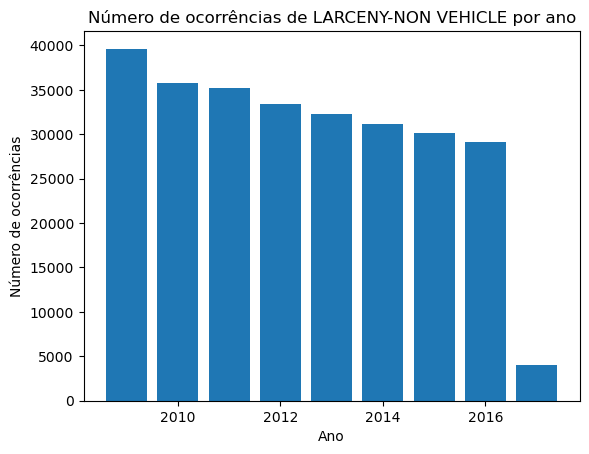

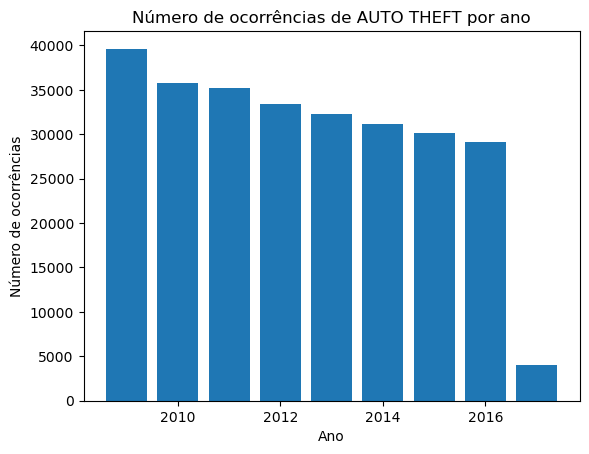

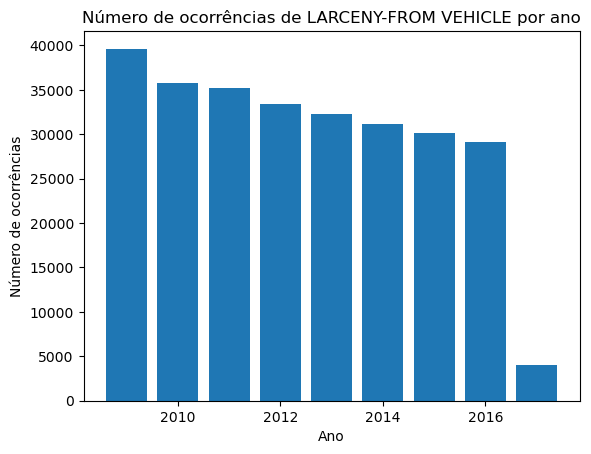

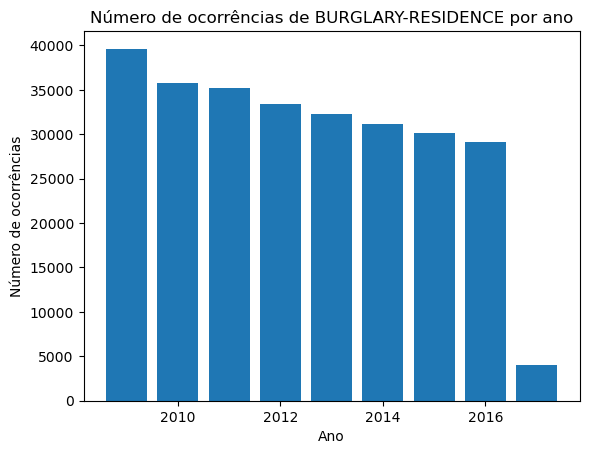

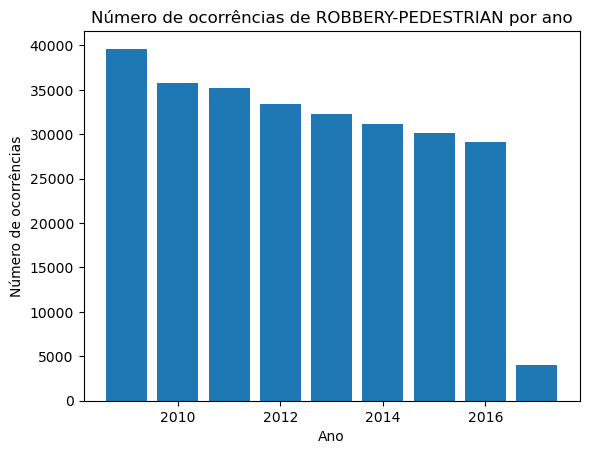

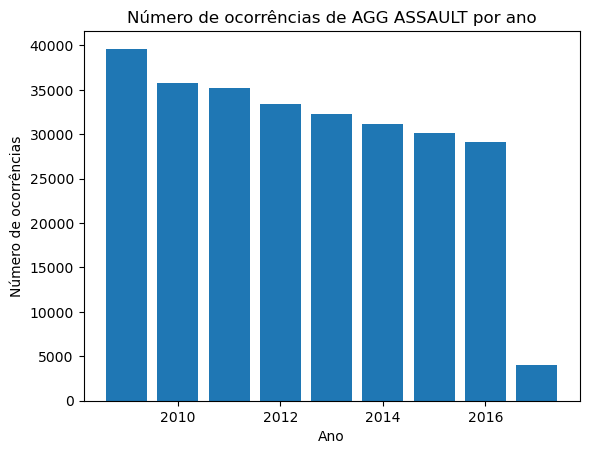

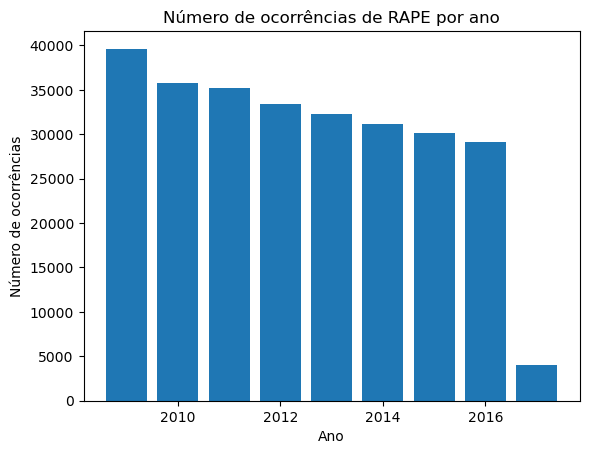

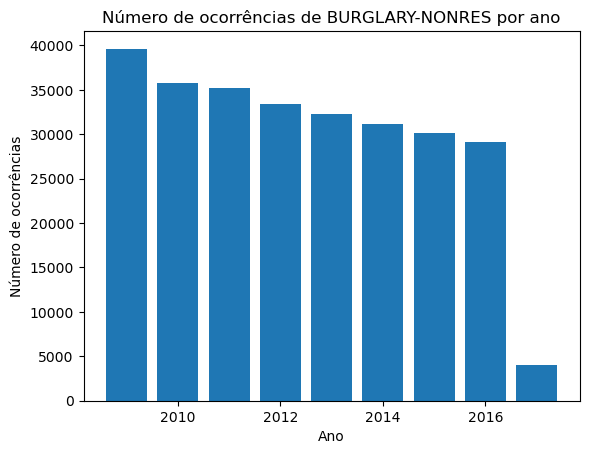

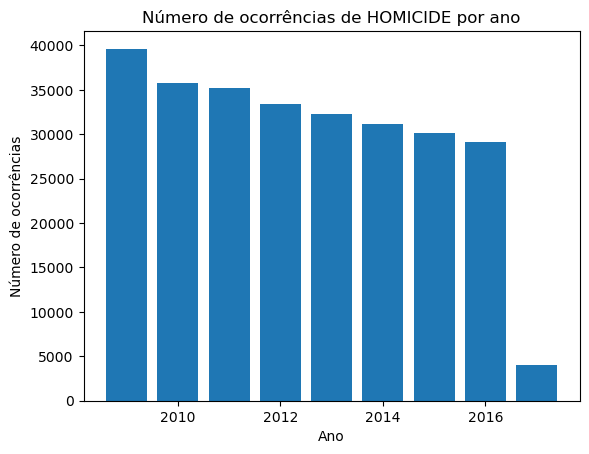

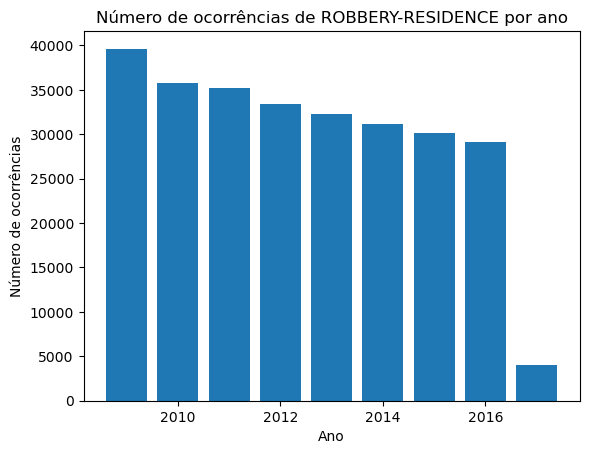

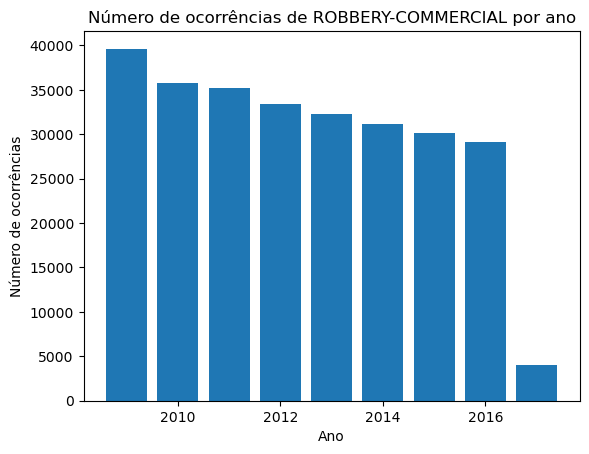

In [33]:
# Define a lista de crimes que deseja analisar
crimes = ['LARCENY-NON VEHICLE', 'AUTO THEFT', 'LARCENY-FROM VEHICLE',
          'BURGLARY-RESIDENCE', 'ROBBERY-PEDESTRIAN', 'AGG ASSAULT', 'RAPE',
          'BURGLARY-NONRES', 'HOMICIDE', 'ROBBERY-RESIDENCE', 'ROBBERY-COMMERCIAL']

# Converte a coluna "data" para o tipo datetime
df_copia['date'] = pd.to_datetime(df_copia['date'])


# Loop para gerar um gráfico para cada crime
for crime in crimes:
    # Filtra o dataframe para obter apenas o crime desejado
    df_crime = df_copia[df_copia['crime'] == crime]
    
    # Agrupa os dados por ano e calcula a contagem
    grouped = df_copia.groupby(df_copia['date'].dt.year).size().reset_index(name='count')
    
    # Gera o gráfico de barras
    plt.bar(grouped['date'], grouped['count'])
    plt.title(f'Número de ocorrências de {crime} por ano')
    plt.xlabel('Ano')
    plt.ylabel('Número de ocorrências')
    plt.show()

# Referências Bibliograficas 

https://pt.wikipedia.org/wiki/Toler%C3%A2ncia_zero

https://agenciabrasil.ebc.com.br/geral/noticia/2018-06/politica-de-tolerancia-zero-nos-eua-diminuiu-crimes-e-lotou-presidios

In [55]:
FiltroSem2017 = df_copia.loc[df_copia['date'].dt.year < 2017]
FiltroSem2017

,crime,number,date,location,beat,neighborhood,npu,lat,long,year,Ano
0,LARCENY-NON VEHICLE,103040029,2010-10-31,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895,2010,2010
1,AUTO THEFT,103040061,2010-10-31,850 OAK ST SW,401,West End,T,33.74057,-84.41680,2010,2010
2,LARCENY-FROM VEHICLE,103040169,2010-10-31,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774,2010,2010
3,AUTO THEFT,103040174,2010-10-31,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674,2010,2010
4,LARCENY-NON VEHICLE,103040301,2010-10-31,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626,2010,2010
...,...,...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,2009-09-01,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741,2009,2009
270684,LARCENY-FROM VEHICLE,92442164,2009-09-01,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013,2009,2009
270685,LARCENY-NON VEHICLE,92448045,2009-09-01,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204,2009,2009
270686,LARCENY-NON VEHICLE,92440866,2009-09-01,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600,2009,2009


In [88]:
FiltroSem2017['mes_ano'] = FiltroSem2017['date'].dt.strftime('%m/%Y')
FiltroSem2017['mes_ano'] = pd.to_datetime(FiltroSem2017['mes_ano'], format='%m/%Y')
FiltroSem2017

C:\Users\55279\AppData\Local\Temp\ipykernel_8532\2310507825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FiltroSem2017['mes_ano'] = FiltroSem2017['date'].dt.strftime('%m/%Y')
C:\Users\55279\AppData\Local\Temp\ipykernel_8532\2310507825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FiltroSem2017['mes_ano'] = pd.to_datetime(FiltroSem2017['mes_ano'], format='%m/%Y')


,crime,number,date,location,beat,neighborhood,npu,lat,long,year,Ano,mes_ano
0,LARCENY-NON VEHICLE,103040029,2010-10-31,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895,2010,2010,2010-10-01
1,AUTO THEFT,103040061,2010-10-31,850 OAK ST SW,401,West End,T,33.74057,-84.41680,2010,2010,2010-10-01
2,LARCENY-FROM VEHICLE,103040169,2010-10-31,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774,2010,2010,2010-10-01
3,AUTO THEFT,103040174,2010-10-31,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674,2010,2010,2010-10-01
4,LARCENY-NON VEHICLE,103040301,2010-10-31,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626,2010,2010,2010-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,2009-09-01,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741,2009,2009,2009-09-01
270684,LARCENY-FROM VEHICLE,92442164,2009-09-01,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013,2009,2009,2009-09-01
270685,LARCENY-NON VEHICLE,92448045,2009-09-01,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204,2009,2009,2009-09-01
270686,LARCENY-NON VEHICLE,92440866,2009-09-01,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600,2009,2009,2009-09-01


In [142]:
CrimesMY = FiltroSem2017.groupby(FiltroSem2017['mes_ano'])['crime'].count()
CrimesMY = CrimesMY.reset_index()
CrimesMY

,mes_ano,crime
0,2009-01-01,3537
1,2009-02-01,2671
2,2009-03-01,3048
3,2009-04-01,3089
4,2009-05-01,3375
...,...,...
91,2016-08-01,2724
92,2016-09-01,2668
93,2016-10-01,2664
94,2016-11-01,2219


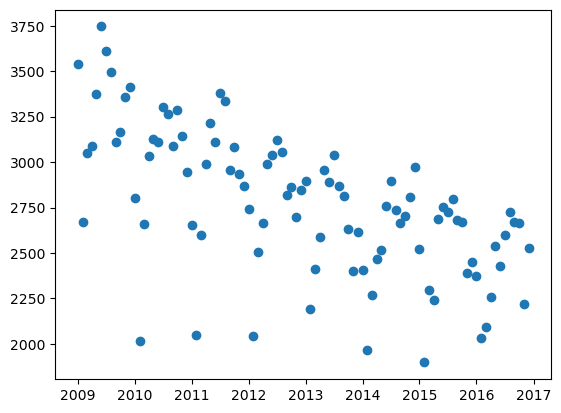

In [111]:
plt.scatter(CrimesMY['mes_ano'],CrimesMY['crime'])

In [136]:
from sklearn.linear_model import LinearRegression

# Supondo que você tenha um DataFrame chamado "dados" com as colunas "mês" e "quantidade de crimes"

# Preparar os dados para a regressão linear
X = CrimesMY['mes_ano'].values.reshape(-1, 1)  # Variável independente (mês)
y = CrimesMY['crime'].values  # Variável dependente (quantidade de crimes)

# Criar o objeto de regressão linear
regressor = LinearRegression()

# Ajustar o modelo aos dados
regressor.fit(X, y)

LinearRegression()

In [154]:
# Prever a quantidade de crimes para o ano de 2017
ano_janeiro_2017 = '01/01/2017'  # Ano de janeiro de 2017
ano_janeiro_2017.dt.strftime('%m/%Y')
ano_janeiro_2017 = pd.to_datetime(ano_janeiro_2017, format='%m/%Y')
quantidade_prevista = regressor.predict([[ano_janeiro_2017]])

# Exibir a quantidade prevista de crimes para o ano de 2017
print("Quantidade prevista de crimes para o ano de 2017:", quantidade_prevista)

AttributeError: 'str' object has no attribute 'dt'

In [125]:
df_copia['mes_ano'] = df_copia['date'].dt.strftime('%m/%Y')
df_copia['mes_ano'] = pd.to_datetime(df_copia['mes_ano'], format='%m/%Y')
df_copia

,crime,number,date,location,beat,neighborhood,npu,lat,long,year,Ano,mes_ano
0,LARCENY-NON VEHICLE,103040029,2010-10-31,610 SPRING ST NW,509,Downtown,M,33.77101,-84.38895,2010,2010,2010-10-01
1,AUTO THEFT,103040061,2010-10-31,850 OAK ST SW,401,West End,T,33.74057,-84.41680,2010,2010,2010-10-01
2,LARCENY-FROM VEHICLE,103040169,2010-10-31,1344 METROPOLITAN PKWY SW,301,Capitol View Manor,X,33.71803,-84.40774,2010,2010,2010-10-01
3,AUTO THEFT,103040174,2010-10-31,1752 PRYOR RD SW,307,Betmar LaVilla,Y,33.70731,-84.39674,2010,2010,2010-10-01
4,LARCENY-NON VEHICLE,103040301,2010-10-31,JOHN WESLEY DOBBS AVE NE / CORLEY ST NE,604,Old Fourth Ward,M,33.75947,-84.36626,2010,2010,2010-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
270683,BURGLARY-RESIDENCE,92442142,2009-09-01,1226 PORTLAND AVE SE,612,East Atlanta,W,33.73927,-84.34741,2009,2009,2009-09-01
270684,LARCENY-FROM VEHICLE,92442164,2009-09-01,317 PICKFAIR WAY SW,307,Lakewood Heights,Y,33.70436,-84.40013,2009,2009,2009-09-01
270685,LARCENY-NON VEHICLE,92448045,2009-09-01,6234 SPINE RD @ATRIUM,50,NaN,NaN,33.64068,-84.44204,2009,2009,2009-09-01
270686,LARCENY-NON VEHICLE,92440866,2009-09-01,30 WARREN ST,610,Kirkwood,O,33.75374,-84.32600,2009,2009,2009-09-01


In [130]:
Filtro2017 = df_copia.loc[df_copia['mes_ano'] == '2017-01']
Filtro2017['crime'].count()

2222